Exercise 2.1

In [61]:
import pandas as pd
import numpy as np
import time
import timeit

In [15]:
beta = 0.96 ** 20
delta = 1 - (1 - 0.05) ** 20
sigma = 3
A = 1
alpha = 0.35
nvec = np.array([1, 1, 0.2])

In [21]:
def util(c, sigma):
    return (c ** (1 - sigma) - 1) * (1 - sigma)

def mu(c, sigma):
    return c ** (-sigma)

def Y(K, L, A, alpha):
    return A * (K ** alpha) * (L ** (1 - alpha))

def get_r(K, L, A, alpha, delta):
    return alpha * A * (L / K) ** (1 - alpha) - delta

def get_w(K, L, A, alpha):
    return (1 - alpha) * A * (K / L) ** alpha

def get_l(nvec):
    return nvec.sum()

def get_k(bvec):
    return bvec.sum()

In [22]:
def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    bvec = bvec_guess
    L = get_l(nvec)
    K = get_k(bvec)
    w = get_w(K, L, A, alpha)
    r = get_r(K, L, A, alpha, delta)
    c1 = nvec[0] * w - bvec[0]
    c2 = nvec[1] * w + (1 + r) * bvec[0] - bvec[1]
    c3 = nvec[2] * w + (1 + r) * bvec[1]
    
    K_cnstr, c_cnstr, b_cnstr = np.full(1, False), np.full(3, False), np.full(2, False)

    K_cnstr[0] = K <= 0
    c_cnstr = [(c1 <= 0), (c2 <= 0), (c3 <= 0)]

    if c_cnstr[0] == True:
        b_cnstr[0] = True
    if c_cnstr[1] == True:
        b_cnstr[0], b_cnstr[1] = True, True
    if c_cnstr[2] == True:
        b_cnstr[1] = True
                
    return b_cnstr, c_cnstr, K_cnstr

In [24]:
#a
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, np.array([1.0, 1.2]))
print("b_cnstr is", b_cnstr)
print("c_cnstr is", c_cnstr)
print("k_cnstr is", K_cnstr)

b_cnstr is [ True False]
c_cnstr is [True, False, False]
k_cnstr is [False]


It shows consumption nonnegativity constraint has been violated.

In [25]:
#b
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, np.array([0.06, -0.001]))
print("b_cnstr is", b_cnstr)
print("c_cnstr is", c_cnstr)
print("k_cnstr is", K_cnstr)

b_cnstr is [False False]
c_cnstr is [False, False, False]
k_cnstr is [False]


None has been violated.

In [26]:
#c
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, np.array([0.1, 0.1]))
print("b_cnstr is", b_cnstr)
print("c_cnstr is", c_cnstr)
print("k_cnstr is", K_cnstr)

b_cnstr is [False False]
c_cnstr is [False, False, False]
k_cnstr is [False]


None has been violated.

Exercise 2.2

In [68]:
def euler_equation(bvec, *args):
    beta, sigma, nvec, A, alpha, delta = args
    K = get_k(bvec)
    L = get_l(nvec)
    w = get_w(K, L, A, alpha)
    r = get_r(K, L, A, alpha, delta)
    c1 = nvec[0] * w - bvec[0]
    c2 = nvec[1] * w + (1 + r) * bvec[0] - bvec[1]
    c3 = nvec[2] * w + (1 + r) * bvec[1]
    mu1 = mu(c1, sigma)
    mu2 = mu(c2, sigma)
    mu3 = mu(c3, sigma)
    return np.array([mu1 - beta * (1 + r) * mu2, 
                     mu2 - beta * (1 + r) * mu3])

In [79]:
def steady_state(params, bvec_guess, SS_graphs=True):
    beta, sigma, nvec, A, alpha, delta, SS_tol = params
    start_time = timeit.default_timer()
    args = (beta, sigma, nvec, A, alpha, delta)
    b_ss = opt.root(euler_equation, bvec_guess, tol=SS_tol, args=(args)).x
    K_ss = get_k(b_ss)
    L_ss = get_l(nvec)
    w_ss = get_w(K_ss, L_ss, A, alpha)
    r_ss = get_r(K_ss, L_ss, A, alpha, delta)
    c1_ss = nvec[0] * w_ss - b_ss[0]
    c2_ss = nvec[1] * w_ss + (1 + r_ss) * b_ss[0] - b_ss[1]
    c3_ss = nvec[2] * w_ss + (1 + r_ss) * b_ss[1]
    c_ss = np.array([c1_ss, c2_ss, c3_ss])
    Y_ss = Y(K_ss, L_ss, A, alpha)
    C_ss = c_ss.sum()
    EulErr_ss = euler_equation(b_ss, *args)
    RCerr_ss = Y_ss - C_ss - delta * K_ss      
    ss_time = timeit.default_timer() - start_time
    ss_output = {
        'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss, 
        'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss, 
        'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss, 
        'ss_time': ss_time 
    }
    
    if SS_graphs:
        fig, ax = plt.subplots()
        ax.plot(np.arange(1, 4), c_ss, marker="o", label="Consumption (Steady State)")
        ax.plot(np.arange(2, 4), b_ss, marker="o", label="Savings (Steady State)")
        ax.legend()
        ax.set_title("The Steady-state Distribution of Consumption and Savings")
        plt.show();
        
    return ss_output

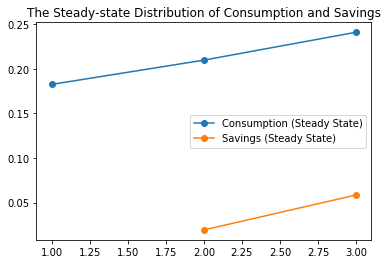

{'b_ss': array([0.01931274, 0.05841159]),
 'c_ss': array([0.18241256, 0.20961491, 0.24087382]),
 'w_ss': 0.2017252935955733,
 'r_ss': 2.4330302535646116,
 'K_ss': 0.07772432611811347,
 'Y_ss': 0.6827625321696328,
 'C_ss': 0.6329012827935535,
 'EulErr_ss': array([-1.33582034e-12,  2.67164069e-12]),
 'RCerr_ss': 3.469446951953614e-17,
 'ss_time': 0.0008656780000819708}

In [80]:
#a & b
SS_tol = 1e-10
params = (beta, sigma, nvec, A, alpha, delta, SS_tol)
ss_output = steady_state(params, np.array([0.1, 0.1]), SS_graphs=True)
ss_output

Those values are listed as above. It takes about 0.00086 seconds to compute the steady state.

In [82]:
#c
params = (0.55, sigma, nvec, A, alpha, delta, SS_tol)
ss_output = steady_state(params, bvec_guess, False)
ss_output

{'b_ss': array([0.02817696, 0.07686557]),
 'c_ss': array([0.19597535, 0.22861559, 0.26669216]),
 'w_ss': 0.22415231191003315,
 'r_ss': 1.8863599991452351,
 'K_ss': 0.10504252550764615,
 'Y_ss': 0.7586693633878046,
 'C_ss': 0.6912831045288896,
 'EulErr_ss': array([-2.84217094e-14, -2.84217094e-14]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.0006394020001607714}

The savings, consumptions, wages in each period, capital accumulation, outputs and total consumptions all increase, and the interest rate decreases. This makes sense a lot. Since people become more patient, they value future more. So the saving increase, thus the capital increase (investment = savings at equilibrium) and the interest rate decrease. When K increase, the marginal productivity of labor goes up, thus the wage goes up.

Exercise 2.3

In [ ]:
T = 40
m = 8
epsilon = 1e-9
xi = 0.1
params = (beta, sigma, nvec, A, alpha, delta, SS_tol)
b_ss = get_SS(params, np.array([0.1, 0.1]), SS_graphs=False)['b_ss']
b21, b31 = (0.8 * b_ss[0], 1.1 * b_ss[1])
K1 = get_k(np.array([b21, b31]))
K_ss = get_k(b_ss)

In [129]:
def euler_initial(b32, *args):
    b21, w_path, r_path, beta, sigma, nvec = args
    c2 = nvec[1] * w_path[0] + (1 + r_path[0]) * b21 - b32
    c3 = nvec[2] * w_path[1] + (1 + r_path[1]) * b32
    MU2 = mu(c2, sigma)
    MU3 = mu(c3, sigma)
    return MU2 - beta * (1 + r_path[1]) * MU3

def euler(bvec, *args):
    t, w_path, r_path, beta, sigma, nvec = args
    c1 = nvec[0] * w_path[t - 1] - bvec[0]
    c2 = nvec[1] * w_path[t] + (1 + r_path[t]) * bvec[0] - bvec[1]
    c3 = nvec[2] * w_path[t + 1] + (1 + r_path[t + 1]) * bvec[1]
    MU1 = mu(c1, sigma)
    MU2 = mu(c2, sigma)
    MU3 = mu(c3, sigma)
    return np.array([MU1 - beta * (1 + r_path[t]) * MU2, MU2 - beta * (1 + r_path[t + 1]) * MU3])

In [130]:
def K_path_prime_cal(T, params, bvec_guess):
    b21, b31, K_path, L_path, beta, sigma, nvec, A, alpha, delta, SS_tol = params
    w_path = get_w(K_path, L_path, A, alpha)
    r_path = get_r(K_path, L_path, A, alpha, delta)
    K_path_prime = [0] * (T - 1)
    C_path_prime = [0] * (T - 1)
    EulErr_path_prime_2 = [0]
    EulErr_path_prime_3 = []
    b2_path_prime = [b21]
    b3_path_prime = [b31]
    c1_path_prime = [0] * (T - 1)
    c2_path_prime = [0] * T
    c3_path_prime = [nvec[2] * w_path[0] + (1 + r_path[0]) * b31] + [0] * T
    for t in range(T - 1):
        if t == 0: 
            args = (b21, w_path, r_path, beta, sigma, nvec)
            b32 = opt.root(euler_initial, bvec_guess[1], tol=SS_tol, args=(args)).x[0]
            b3_path_prime.append(b32)
            c2 = nvec[1] * w_path[0] + (1 + r_path[0]) * b21 - b32
            c3 = nvec[2] * w_path[1] + (1 + r_path[1]) * b32
            c2_path_prime[t] = c2
            c3_path_prime[t + 1] = c3
            EulErr_path_prime_3.append(abs(euler_initial(b32, *args)))
        else: 
            args = (t, w_path, r_path, beta, sigma, nvec)
            btp12, btp23 = opt.root(euler, bvec_guess, tol=SS_tol, args=(args)).x
            b2_path_prime.append(btp12)
            b3_path_prime.append(btp23)
            K_path_prime[t - 1] = b2_path_prime[t - 1] + b3_path_prime[t - 1]
            c1 = nvec[0] * w_path[t - 1] - btp12
            c2 = nvec[1] * w_path[t] + (1 + r_path[t]) * btp12 - btp23
            c3 = nvec[2] * w_path[t + 1] + (1 + r_path[t + 1]) * btp23
            c1_path_prime[t - 1] = c1
            c2_path_prime[t] = c2
            c3_path_prime[t + 1] = c3
            C_path_prime[t - 1] = c1_path_prime[t - 1] + c2_path_prime[t - 1] + c3_path_prime[t - 1]
            EulErr_path_prime_2.append(abs(euler(np.array([btp12, btp23]), *args)[0]))
            EulErr_path_prime_3.append(abs(euler(np.array([btp12, btp23]), *args)[1]))

    Y_path_prime = Y(np.array(K_path_prime)[:T - 3], L_path[:T - 3], A, alpha)
    RCerr_path_prime = abs(Y_path_prime - np.array(C_path_prime)[:T - 3] 
                           - np.array(K_path_prime)[1: T - 2] 
                           + (1 - delta) * np.array(K_path_prime)[:T - 3])
    return (np.array(K_path_prime)[:T - 3], 
            np.array([max(EulErr_path_prime_2[:T - 3]), max(EulErr_path_prime_3[:T - 3])]), 
            np.array([max(RCerr_path_prime)]))

In [151]:
K_path = np.linspace(K1, K_ss, T)
K_path = np.append(K_path, np.array([K_ss] * m))
L_path = np.ones(T + m) * L_clear(nvec)
i = 0
max_iter = 200
while True:
    params = np.array([b21, b31, K_path, L_path, beta, sigma, nvec, A, alpha, delta, SS_tol])
    K_path_prime, max_EulErr, max_RCerr = K_path_prime_cal(T + m, params, np.array([0.1, 0.1]))
    K_dist = ((K_path[:40] - K_path_prime[:40]) ** 2).sum()
    print("The distance for interation {}: {}.".format(i + 1, K_dist))
    if K_dist < epsilon:
        print("It converges after {} iterations.".format(i + 1))
        break
    else:
        K_path = xi * K_path_prime + (1 - xi) * K_path[:K_path_prime.shape[0]]
        K_path = np.append(K_path, [K_ss] * (T + m - K_path_prime.shape[0]))
        i += 1
    if i >= max_iter:
        print("It fails to converge.")

The distance for interation 1: 2.7058289854466913e-05.
The distance for interation 2: 2.2498414339488714e-05.
The distance for interation 3: 1.8792310632496185e-05.
The distance for interation 4: 1.5766235807365667e-05.
The distance for interation 5: 1.3283953570801483e-05.
The distance for interation 6: 1.1238307792670742e-05.
The distance for interation 7: 9.54474146621184e-06.
The distance for interation 8: 8.136303149258708e-06.
The distance for interation 9: 6.959792312425039e-06.
The distance for interation 10: 5.9727779809689125e-06.
The distance for interation 11: 5.141288035804328e-06.
The distance for interation 12: 4.438014392979029e-06.
The distance for interation 13: 3.8409156786789785e-06.
The distance for interation 14: 3.3321267306786818e-06.
The distance for interation 15: 2.897105382920571e-06.
The distance for interation 16: 2.5239631129678536e-06.
The distance for interation 17: 2.20293845253861e-06.
The distance for interation 18: 1.9259814883567546e-06.
The distan

In [153]:
#a
print("Maximum of the absolute values of all the Euler errors across the entire time path is {}.".format(max_EulErr))
print("Maximum of the absolute values of all the resource constraint errors across the entire time path is {}.".format(max_RCerr[0]))

Maximum of the absolute values of all the Euler errors across the entire time path is [2.27373675e-13 1.27897692e-13].
Maximum of the absolute values of all the resource constraint errors across the entire time path is 1.1118147097421982e-09.


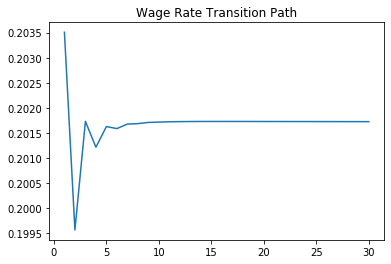

In [145]:
#b
plt.plot(range(1, T + 6), get_w(K_path_prime[: T + 5], L_path[: T + 5], A, alpha))
plt.title("Wage Rate Transition Path")
plt.show()

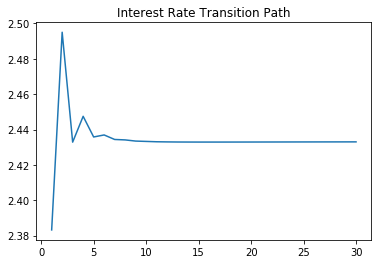

In [146]:
plt.plot(range(1, T + 6), get_r(K_path_prime[: T + 5], L_path[: T + 5], A, alpha, delta))
plt.title("Interest Rate Transition Path")
plt.show()

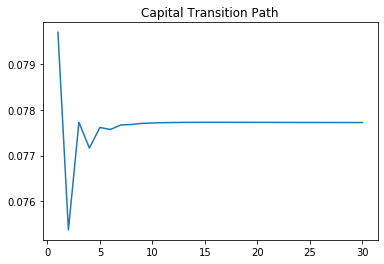

In [147]:
plt.plot(range(1, T + 6), K_path_prime[: T + 5])
plt.title("Capital Transition Path")
plt.show();

In [149]:
#c
K_div = abs(K_path_prime - np.array([K_ss] * K_path_prime.shape[0]))
loc1 = np.where(K_div < 1e-5)[0]
print("It takes {} periods to get within 0.00001.".format(loc1.min()))
for i in range(len(K_path_prime)):
    if K_div[i] <= 1e-5:
        mark_allinrange = 1
        for j in range(i + 1, len(K_path_prime)):
            if K_div[j] > 1e-5:
                mark_allinrange = 0
                break
        if mark_allinrange:
            print("It is {} periods after which the aggerate capital stock is never again further than 0.00001.".format(i))
            break

It takes 2 periods to get within 0.00001.
It is 9 periods after which the aggerate capital stock is never again further than 0.00001.
